In [1]:
import numpy as np
import seaborn as sns
import cv2, os, glob, datetime
import matplotlib.pyplot as plt
from keras import layers, Input
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.applications import InceptionV3
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout, GlobalAveragePooling2D

inp=299
model =  InceptionV3(weights="imagenet",include_top=False,input_shape=(inp, inp, 3))
folders = glob.glob(r"D:\Hikmat system\Fire Datasets\Only Dataset\Orignal DFAN\The proposed diverse dataset\*")

img_list = []
label_list=[]

for folder in folders:
    print(folder) 
    for img in glob.glob(folder+r"/*.jpg"):
        n= cv2.imread(img)
        class_num = folders.index(folder)
        label_list.append(class_num)
        resized = cv2.resize(n, (299,299), interpolation = cv2.INTER_AREA)
        img_list.append(resized)

X_train, X_valid, y_train, y_valid = train_test_split(img_list, label_list, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1,random_state=1)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)
print ("training_set", X_train.shape)
print ("training_set", y_train.shape)
print ("validation_set",X_valid.shape)
print ("validation_set",y_valid.shape)
print ("test_set",X_test.shape)
print ("test_set",y_test.shape)
print("Train_Folder",len(X_train))
print("validation_Folder",len(X_valid))
print("Test_Folder",len(X_test))


D:\Hikmat system\Fire Datasets\Only Dataset\Orignal DFAN\The proposed diverse dataset\Boat_Fire
D:\Hikmat system\Fire Datasets\Only Dataset\Orignal DFAN\The proposed diverse dataset\Building_Fire
D:\Hikmat system\Fire Datasets\Only Dataset\Orignal DFAN\The proposed diverse dataset\Bus_Fire
D:\Hikmat system\Fire Datasets\Only Dataset\Orignal DFAN\The proposed diverse dataset\Cargo_Fire
D:\Hikmat system\Fire Datasets\Only Dataset\Orignal DFAN\The proposed diverse dataset\Car_Fire
D:\Hikmat system\Fire Datasets\Only Dataset\Orignal DFAN\The proposed diverse dataset\Electric_Fire
D:\Hikmat system\Fire Datasets\Only Dataset\Orignal DFAN\The proposed diverse dataset\Forest_Fire
D:\Hikmat system\Fire Datasets\Only Dataset\Orignal DFAN\The proposed diverse dataset\Non_Fire
D:\Hikmat system\Fire Datasets\Only Dataset\Orignal DFAN\The proposed diverse dataset\PickUp_Fire
D:\Hikmat system\Fire Datasets\Only Dataset\Orignal DFAN\The proposed diverse dataset\SUV_Fire
D:\Hikmat system\Fire Datasets\

In [2]:
inputs =Input((inp, inp, 3))
X = model(inputs)
flat1 = GlobalAveragePooling2D()(X)
x3=layers.GlobalAveragePooling2D()(X)
x1=layers.Dense(100, activation='relu')(flat1)
x1=layers.Dense(50, activation='relu')(x1)
x1=layers.BatchNormalization()(x1)

x2=layers.Conv2D(filters = 64,kernel_size = (1,1), activation='relu', padding='same')(X)
x2=layers.Conv2D(filters = 64,kernel_size = (3,3), activation='relu', padding='same')(x2)
x2=layers.Conv2D(filters = 64,kernel_size = (1,1), activation='relu', padding='same')(x2)

x2=layers.GlobalAveragePooling2D()(x2)
x2=layers.BatchNormalization()(x2)

BAM=layers.concatenate([x1, x2])
BAM=layers.BatchNormalization()(BAM)
BAM=layers.concatenate([x3, BAM])

F=layers.Dense(150, activation='relu')(BAM)
F=layers.BatchNormalization()(F)
output = Dense(12,activation='softmax')(F)
model = Model(inputs=inputs, outputs=output)

model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, 8, 8, 2048)   21802784    ['input_2[0][0]']                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 8, 8, 64)     131136      ['inception_v3[0][0]']           
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['inception_v3[0][0]']       

In [3]:
batch_size = 24
epochs = 50
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_valid,y_valid))
model.save("DFAN.h5")

C:\Users\Hikmat\anaconda3\envs\paper\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
115/115 [==============================] - 24s 140ms/step - loss: 1.4339 - accuracy: 0.5663 - val_loss: 1.8829 - val_accuracy: 0.4218
Epoch 2/50
115/115 [==============================] - 14s 118ms/step - loss: 0.4764 - accuracy: 0.8586 - val_loss: 0.7795 - val_accuracy: 0.7674
Epoch 3/50
115/115 [==============================] - 14s 119ms/step - loss: 0.1473 - accuracy: 0.9660 - val_loss: 0.4690 - val_accuracy: 0.8528
Epoch 4/50
115/115 [==============================] - 14s 119ms/step - loss: 0.0635 - accuracy: 0.9890 - val_loss: 0.3916 - val_accuracy: 0.8765
Epoch 5/50
115/115 [==============================] - 13s 117ms/step - loss: 0.0396 - accuracy: 0.9934 - val_loss: 0.4008 - val_accuracy: 0.8673
Epoch 6/50
115/115 [==============================] - 14s 118ms/step - loss: 0.0317 - accuracy: 0.9934 - val_loss: 0.4173 - val_accuracy: 0.8699
Epoch 7/50
115/115 [==============================] - 14s 120ms/step - loss: 0.0215 - accuracy: 0.9974 - val_loss: 0.3649 - val_ac

<Figure size 2160x2160 with 0 Axes>

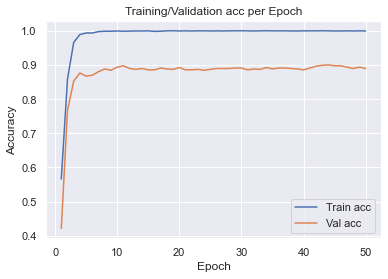

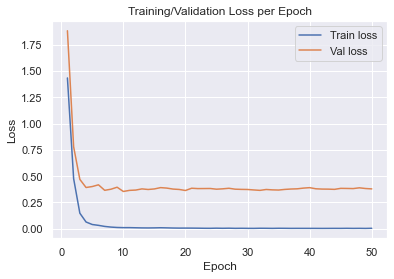

10/10 [==============================] - 2s 34ms/step
***** Confusion Matrix *****
[[19  0  0  0  1  0  0  0  1  0  0  0]
 [ 0 24  0  0  0  1  1  0  0  0  0  0]
 [ 0  0 23  0  0  1  0  0  0  0  0  1]
 [ 0  0  1  9  4  0  0  0  1  0  0  2]
 [ 0  0  1  1 48  0  0  0  1  0  0  0]
 [ 0  1  0  0  0 22  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  7  0  0  1  0]
 [ 0  0  0  0  3  0  1  0 17  0  0  1]
 [ 0  0  0  0  0  0  1  0  0 17  1  0]
 [ 0  1  0  0  1  0  0  0  0  0 21  1]
 [ 0  0  0  0  1  1  0  0  0  0  0 24]]
***** Classification Report *****
               precision    recall  f1-score   support

    Boat_Fire       1.00      0.90      0.95        21
Building_Fire       0.92      0.92      0.92        26
     Bus_Fire       0.92      0.92      0.92        25
     Car_Fire       0.90      0.53      0.67        17
   Cargo_Fire       0.83      0.94      0.88        51
Electric-Fire       0.88      0.92      0.90        24
  Forest_Fire       0.91    

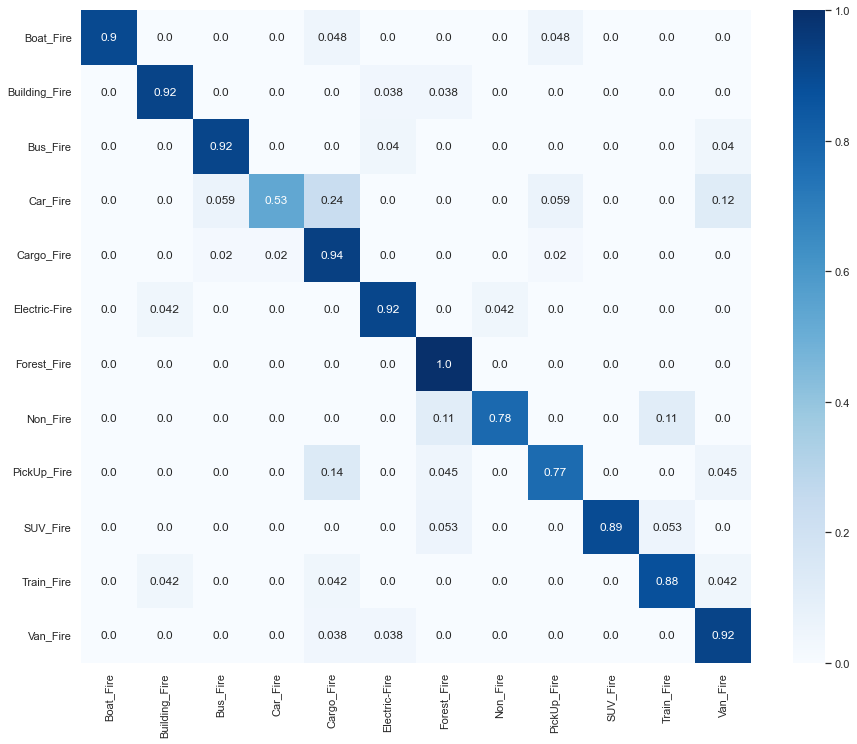

10/10 [==============================] - 0s 37ms/step - loss: 0.4688 - accuracy: 0.8918

Testing loss: 0.4688
Testing accuracy: 0.8918


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix
import matplotlib.pyplot as plot
import seaborn as sn
import pandas as pd
import seaborn as sns
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report 
import numpy as np
plt.figure(figsize=(30,30))
sns.set(font_scale=1.0)

f, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'])
ax.plot([None] + history.history['val_accuracy'])
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Val acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'])
ax.plot([None] + history.history['val_loss'])
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 1)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()


y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)

target_names = ["Boat_Fire","Building_Fire","Bus_Fire","Car_Fire","Cargo_Fire","Electric-Fire","Forest_Fire","Non_Fire","PickUp_Fire","SUV_Fire","Train_Fire","Van_Fire"] 
cm = confusion_matrix(y_test, y_pred)
print("***** Confusion Matrix *****")
print(cm)
print("***** Classification Report *****")
print(classification_report(y_test, y_pred, target_names=target_names))
classes=12
con = np.zeros((classes,classes))
for x in range(classes):
    for y in range(classes):
        con[x,y] = cm[x,y]/np.sum(cm[x,:])

plt.figure(figsize=(15,12))
df = sns.heatmap(con, annot=True,fmt='.2', cmap='Blues',xticklabels= target_names , yticklabels= target_names)
df.figure.savefig("DFAN.png")
plt.show()

print('\nTesting loss: {:.4f}\nTesting accuracy: {:.4f}'.format(*model.evaluate(X_test, y_test)))